<h1>Project 17</h1>

<h2>Bias correction of numerical prediction model temperature forecast Data Set</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary libraries***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***


In [2]:
df=pd.read_csv('Bias_correction_ucl.csv',parse_dates=["Date"])
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


<h2>Start of EDA process</h2>

***Checking data types and null count of the columns***


In [3]:
df.shape

(7752, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We see that there are multiple values missing, lets handle them first

In [6]:
df.dropna(subset=["LDAPS_RHmin"], axis=0, inplace=True)
df.dropna(subset=["Present_Tmax"], axis=0, inplace=True)
df.dropna(subset=["Next_Tmax"], axis=0, inplace=True)
df.dropna(subset=["station"], axis=0, inplace=True)
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [7]:
df.shape

(7588, 25)

**There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data.**

**Lets take a differnce between these two columns, and make that as our target variable**

In [8]:
df['Next_Trange']=df['Next_Tmax']-df['Next_Tmin']

In [9]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Next_Trange
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,7.9
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,8.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,7.2
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,7.4
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,8.7


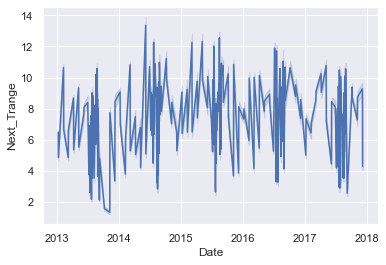

In [10]:
sns.lineplot(x="Date",y="Next_Trange",data=df)

25.0    307
18.0    307
2.0     307
17.0    307
10.0    307
23.0    307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
15.0    302
12.0    302
22.0    302
9.0     302
24.0    302
19.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: station, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


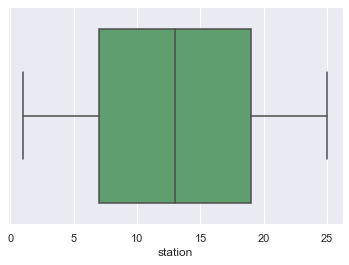

31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
20.1      1
20.4      1
37.1      1
37.6      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


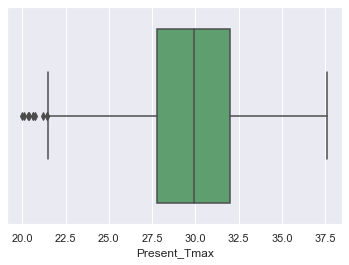

24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.1      1
14.2      1
29.7      1
29.9      1
11.3      1
Name: Present_Tmin, Length: 155, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


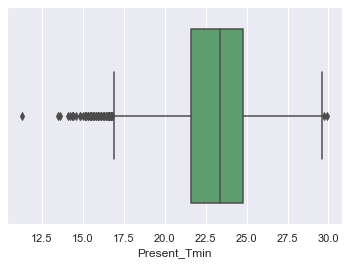

51.810596    2
77.030350    2
71.658089    2
43.947876    1
78.708603    1
            ..
44.005089    1
58.655628    1
58.761993    1
42.186558    1
71.359451    1
Name: LDAPS_RHmin, Length: 7585, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


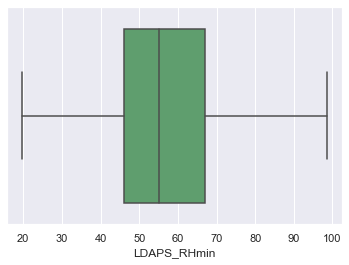

91.776146    2
88.938194    2
94.795967    2
85.863731    2
88.876610    2
            ..
86.014893    1
89.609070    1
88.095352    1
72.922852    1
83.073624    1
Name: LDAPS_RHmax, Length: 7577, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


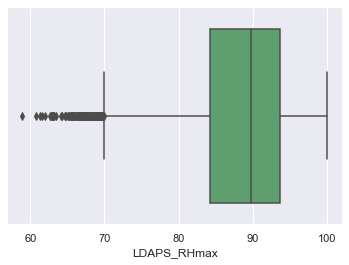

29.732836    1
28.174952    1
30.574987    1
27.753920    1
32.762753    1
            ..
28.761418    1
28.577678    1
32.972568    1
31.208222    1
27.149571    1
Name: LDAPS_Tmax_lapse, Length: 7588, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


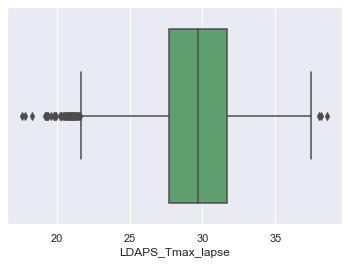

21.797430    1
21.870334    1
16.350055    1
25.728491    1
24.719108    1
            ..
20.861831    1
22.521587    1
25.165670    1
16.640794    1
23.197572    1
Name: LDAPS_Tmin_lapse, Length: 7588, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


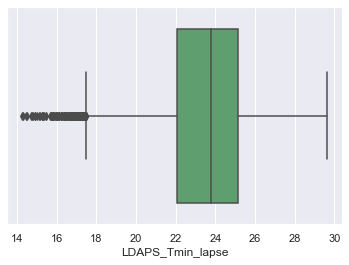

4.633030     1
6.842240     1
6.796009     1
10.157699    1
7.892052     1
            ..
8.867639     1
4.513049     1
11.098644    1
8.118150     1
8.112974     1
Name: LDAPS_WS, Length: 7588, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


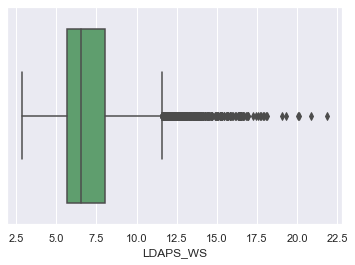

31.292903    1
52.898936    1
18.794811    1
58.594891    1
35.230479    1
            ..
61.306949    1
99.205233    1
10.853051    1
20.780082    1
48.865865    1
Name: LDAPS_LH, Length: 7588, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


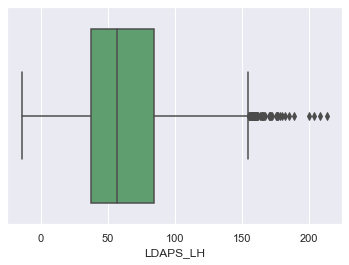

0.000000    104
0.211694      1
0.081400      1
0.130883      1
0.271888      1
           ... 
0.746881      1
0.332259      1
0.917315      1
0.034681      1
0.230776      1
Name: LDAPS_CC1, Length: 7485, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


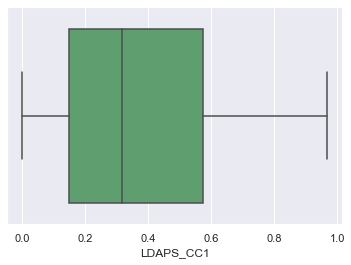

0.000000    93
0.065887     1
0.887668     1
0.808160     1
0.621571     1
            ..
0.215138     1
0.140863     1
0.079483     1
0.103516     1
0.336139     1
Name: LDAPS_CC2, Length: 7496, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


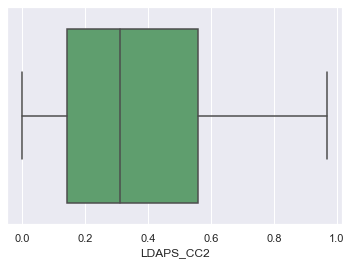

0.000000e+00    75
8.680560e-04     2
5.810000e-07     2
4.416774e-01     1
7.714030e-01     1
                ..
5.022028e-01     1
8.237407e-02     1
6.881582e-01     1
2.444761e-01     1
1.695957e-02     1
Name: LDAPS_CC3, Length: 7512, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


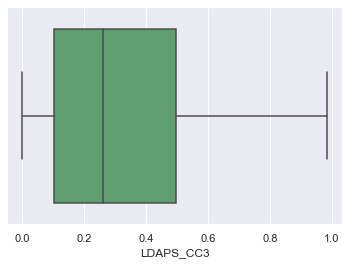

0.000000    135
0.002604      7
0.001736      3
0.005208      3
0.000001      2
           ... 
0.096646      1
0.583172      1
0.707523      1
0.135756      1
0.074535      1
Name: LDAPS_CC4, Length: 7438, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


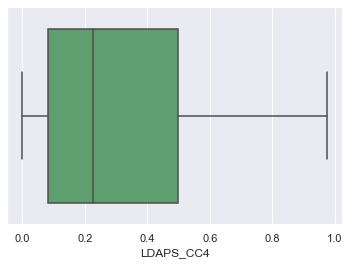

0.000000    4789
0.001953      11
0.002604       5
0.001734       3
0.002199       2
            ... 
0.020203       1
0.002677       1
0.935344       1
6.001337       1
0.163309       1
Name: LDAPS_PPT1, Length: 2779, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


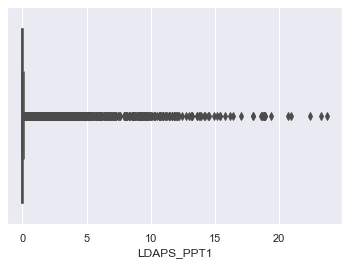

0.000000    5094
0.001953       7
0.000781       3
0.000040       3
0.000014       2
            ... 
0.085236       1
0.041993       1
0.002633       1
0.039292       1
4.211753       1
Name: LDAPS_PPT2, Length: 2479, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


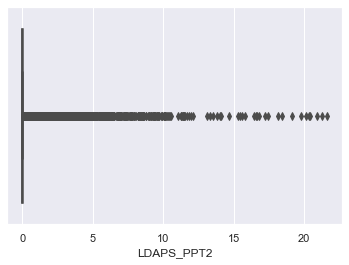

0.000000    5237
0.001953      10
0.000852       4
0.002604       3
0.000163       2
            ... 
0.718585       1
0.041803       1
0.398969       1
0.284441       1
0.011223       1
Name: LDAPS_PPT3, Length: 2326, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


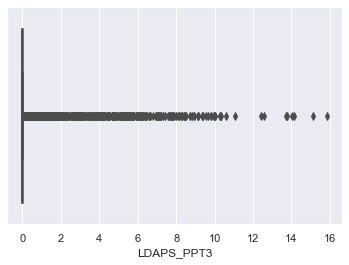

0.000000    5690
0.001953       3
0.001105       2
0.000539       2
0.000046       2
            ... 
5.368769       1
0.113642       1
1.125897       1
0.391944       1
0.053507       1
Name: LDAPS_PPT4, Length: 1892, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


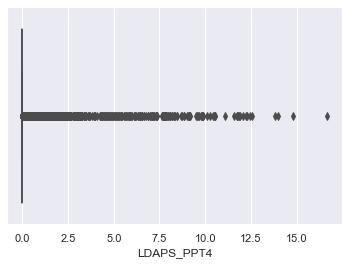

37.5776    1214
37.5507    1204
37.6181     611
37.6046     610
37.5237     609
37.5372     608
37.4967     605
37.4697     604
37.5102     603
37.4832     307
37.4562     307
37.6450     306
Name: lat, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


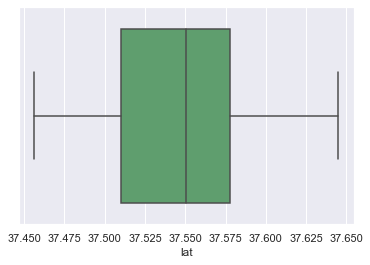

127.099    307
126.955    307
127.024    307
126.970    307
126.891    307
127.032    307
127.022    306
127.058    306
127.083    305
126.995    304
127.040    304
127.004    304
126.927    303
126.991    303
126.826    302
126.938    302
126.937    302
126.909    302
127.086    302
126.988    302
127.042    301
126.838    301
127.085    301
126.910    300
127.135    296
Name: lon, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


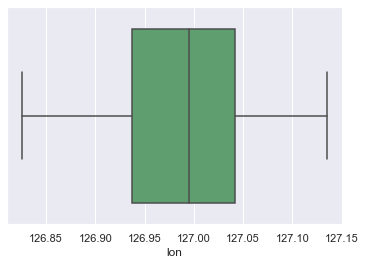

53.4712     307
15.5876     307
44.7624     307
56.4448     307
19.5844     307
208.5070    307
45.7160     306
33.3068     306
59.8324     305
82.2912     304
146.5540    304
26.2980     304
212.3350    303
30.9680     303
50.9312     302
21.9668     302
132.1180    302
30.0464     302
75.0924     302
17.2956     302
28.7000     301
12.3700     301
54.6384     301
52.5180     300
35.0380     296
Name: DEM, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


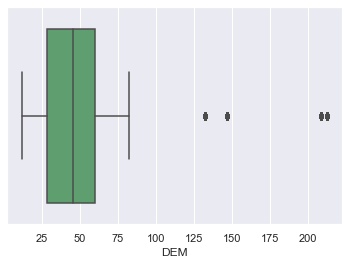

0.6970    307
1.2313    307
0.1554    307
0.5141    307
5.1782    307
0.2713    307
2.5348    306
0.2661    306
2.6865    305
4.7296    304
0.5721    304
2.2579    304
2.7850    303
0.6180    303
0.2223    302
0.4125    302
1.7678    302
0.5931    302
0.8552    302
0.1332    302
0.1457    301
0.0985    301
0.6233    301
1.5629    300
0.5055    296
Name: Slope, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


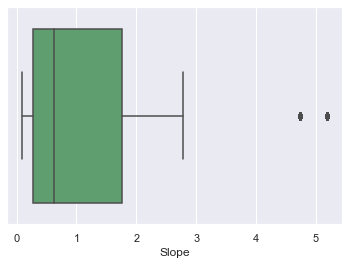

5818.526855    5
5793.305176    5
5319.623535    5
5646.600098    5
5356.832520    5
              ..
4405.562500    1
4430.538574    1
4411.375977    1
4418.823730    1
4463.118652    1
Name: Solar radiation, Length: 1575, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


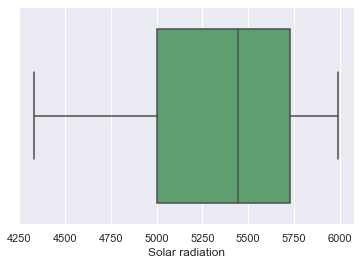

29.3    113
33.0    104
31.3    100
29.6     98
31.2     97
       ... 
38.9      1
21.4      1
20.6      1
38.7      1
18.9      1
Name: Next_Tmax, Length: 181, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


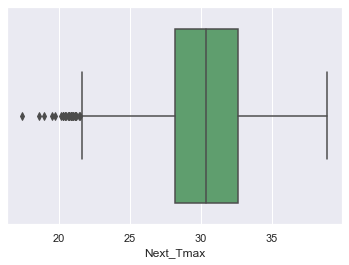

23.5    157
24.0    152
23.4    150
23.2    148
23.8    146
       ... 
28.5      1
29.8      1
13.9      1
13.6      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


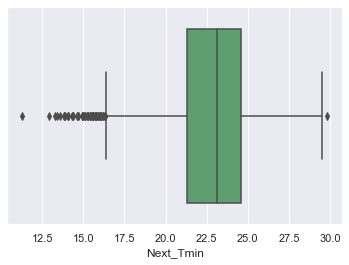

8.5     99
8.0     94
7.0     92
7.5     91
6.0     91
        ..
5.7      1
11.3     1
13.5     1
13.8     1
12.5     1
Name: Next_Trange, Length: 336, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


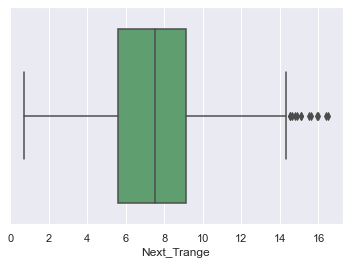

In [11]:
for i in df.columns:
        if df[i].dtype!="datetime64[ns]":
            print(df[i].value_counts())
            print()
            print(sns.boxplot(df[i],color='g'))
            plt.show()

In [12]:
df.drop(['Next_Tmax','Next_Tmin','Date'],axis=1,inplace=True)

We can see visually that there are multiple dots outside the plot which are indicating outliers, here its huge

*Now, we will remove these outliers using below code*

In [13]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
print('The shape of the dataset before removing outliers is',df.shape)
df_z = df[(z < 3).all(axis=1)]
print('The shape of the dataset after removing outliers is',df_z.shape)
df=df_z

The shape of the dataset before removing outliers is (7588, 23)
The shape of the dataset after removing outliers is (6745, 23)


***As we have droped rows, lets reset index***

In [14]:
df.reset_index(drop=True, inplace=True)

***Lets calculate correlation***

In [15]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Trange
station,1.000000,0.110957,0.134250,-0.069768,-0.175724,0.067663,0.104740,0.021600,-0.135351,0.008390,...,-0.001715,-2.098759e-02,0.002384,0.015024,-0.241416,-0.122475,-2.584185e-01,-0.097366,-0.031577,0.003431
Present_Tmax,0.110957,1.000000,0.612361,-0.152192,-0.294516,0.541788,0.618199,-0.107926,0.128570,-0.288069,...,-0.134623,-3.955453e-02,-0.015150,-0.042548,-0.052239,0.010444,-1.699197e-01,-0.092302,-0.056463,0.104228
Present_Tmin,0.134250,0.612361,1.000000,0.152972,-0.035793,0.444627,0.765812,0.014925,-0.006273,0.091487,...,0.074210,8.514843e-02,0.035824,-0.055000,-0.071835,-0.043530,-2.437973e-01,-0.140407,0.025697,-0.232950
LDAPS_RHmin,-0.069768,-0.152192,0.152972,1.000000,0.553694,-0.552254,0.132169,0.234787,-0.035675,0.574862,...,0.289801,3.763957e-01,0.257922,0.185309,0.090877,-0.093932,9.314934e-02,0.117697,0.254635,-0.642914
LDAPS_RHmax,-0.175724,-0.294516,-0.035793,0.553694,1.000000,-0.383122,-0.137104,0.092955,0.272857,0.410493,...,0.308631,2.259635e-01,0.120373,0.106313,0.199865,0.018319,1.709914e-01,0.216961,0.155513,-0.267325
LDAPS_Tmax_lapse,0.067663,0.541788,0.444627,-0.552254,-0.383122,1.000000,0.622936,-0.230610,0.033597,-0.414821,...,-0.181334,-2.368684e-01,-0.141068,-0.159707,-0.039088,0.104966,-1.640884e-01,-0.149578,0.015029,0.433877
LDAPS_Tmin_lapse,0.104740,0.618199,0.765812,0.132169,-0.137104,0.622936,1.000000,-0.056096,-0.138567,0.039142,...,-0.009239,1.321593e-02,0.012774,-0.080333,-0.089969,-0.025337,-1.804677e-01,-0.174335,0.112400,-0.193018
LDAPS_WS,0.021600,-0.107926,0.014925,0.234787,0.092955,-0.230610,-0.056096,1.000000,-0.043518,0.257377,...,0.178565,1.144948e-01,0.121309,0.196047,-0.013537,-0.076470,1.514041e-01,0.118949,0.134405,-0.313124
LDAPS_LH,-0.135351,0.128570,-0.006273,-0.035675,0.272857,0.033597,-0.138567,-0.043518,1.000000,-0.144580,...,-0.001117,-6.649830e-02,0.010965,0.038635,0.125010,0.021936,6.883201e-02,0.101079,-0.034763,0.253075
LDAPS_CC1,0.008390,-0.288069,0.091487,0.574862,0.410493,-0.414821,0.039142,0.257377,-0.144580,1.000000,...,0.544731,3.944833e-01,0.191657,0.196133,-0.005005,-0.013587,-3.106914e-02,-0.037302,0.244962,-0.546374


***Lets visualize using heat map as well***

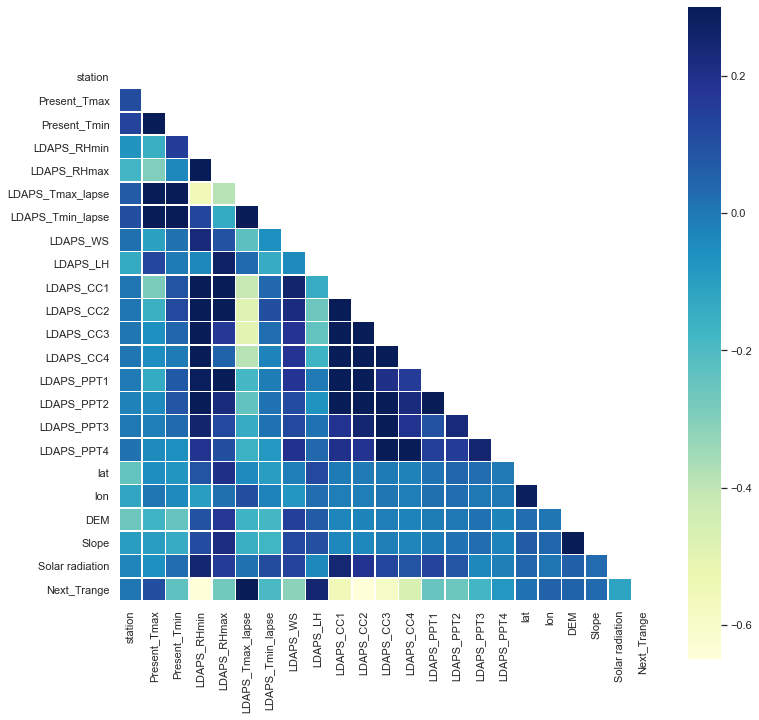

In [16]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=0.5,cmap="YlGnBu")

***Separating our input and output features***

In [17]:
y=df[['Next_Trange']]
y.head()

,Next_Trange
0,7.9
1,8.0
2,7.2
3,7.4
4,8.7


In [18]:
x=df.drop(['Next_Trange'],axis=1)
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


***Lets scale our data using standard scalar***

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
df_x=ss.transform(x)
x=pd.DataFrame(df_x,columns=x.columns)
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-1.672825,-0.423158,-0.809704,0.196575,0.438671,-0.659382,-0.284826,-0.022318,0.224303,-0.439439,...,-0.614536,-0.341225,-0.27786,-0.258945,-0.237623,1.210550,0.002647,2.823844,1.141014,1.543749
1,-1.534044,0.690908,-0.723263,-0.235895,0.365427,-0.014103,0.174105,-0.632764,-0.299616,-0.472974,...,-0.628166,-0.341225,-0.27786,-0.258945,-0.237623,1.210550,0.518527,-0.305266,-0.537011,1.250697
2,-1.395262,0.586464,0.011483,-0.493757,-0.583856,0.073287,0.410975,-0.391004,-1.237841,-0.537206,...,-0.566859,-0.341225,-0.27786,-0.258945,-0.237623,0.671180,0.845670,-0.519179,-0.720265,1.237046
3,-1.256481,0.725723,0.054703,0.195428,1.207033,-0.067153,-0.142317,-0.655426,0.112885,-0.509278,...,-0.600398,-0.341225,-0.27786,-0.258945,-0.237623,2.017607,0.392702,-0.287460,0.956135,1.221418
4,-1.117700,0.516835,-0.593602,0.046344,0.301065,-0.281701,-0.070758,-0.609411,1.376391,-0.767427,...,-0.448076,-0.341225,-0.27786,-0.258945,-0.237623,0.133808,1.814516,-0.486852,-0.543366,1.227553


In [20]:
y.head()

,Next_Trange
0,7.9
1,8.0
2,7.2
3,7.4
4,8.7


We have both of input and output attributes cleaned and in desired format

<h2>End of EDA Process</h2>

Lets start Building models to make predictions and find the model that works best on our dataset


<h2>Start of Machine Learning Process</h2>


***Lets import required packages***

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

***Lets split our data randomly and see which model works better***

In [22]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

***Lets import all the regression models***

In [23]:
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=3)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=3)
RFR=RandomForestRegressor(random_state=3)
GBR=GradientBoostingRegressor(random_state=3)

In [24]:
models=[]
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

***Lets create a loop that will execute all our models***

In [25]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2*100)
    R2_score.append(r2*100)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    score= abs(cross_val_score(model,x,y,cv=10,scoring='r2')).mean()
    print('Cross_Val_Score = ',score*100)
    cvs.append(score*100)
    print('\n')

*-----------------------------* Lasso *------------------------------*
Lasso()
R2_score =  29.07792763155458
Mean_Squared_Error = 4.494297174198548
Cross_Val_Score =  20.68646553978255


*-----------------------------* Ridge *------------------------------*
Ridge()
R2_score =  64.96366775326324
Mean_Squared_Error = 2.2202353054879023
Cross_Val_Score =  51.91695848099263


*-----------------------------* ElasticNet *------------------------------*
ElasticNet()
R2_score =  41.51463253097896
Mean_Squared_Error = 3.7061892436314676
Cross_Val_Score =  30.91249198366309


*-----------------------------* DecisionTreeRegressor *------------------------------*
DecisionTreeRegressor(random_state=3)
R2_score =  61.54937333159112
Mean_Squared_Error = 2.4365974796145293
Cross_Val_Score =  20.749441866459897


*-----------------------------* KNeighborsRegressor *------------------------------*
KNeighborsRegressor()
R2_score =  75.51085194289637
Mean_Squared_Error = 1.55186538176427
Cross_Val_Score =

In [26]:
result = pd.DataFrame({'Regression Model': Model, 'R2 Score': R2_score ,'Mean Squared Error' :MSE,'Cross Validation score':cvs})
result

,Regression Model,R2 Score,Mean Squared Error,Cross Validation score
0,Lasso,29.077928,4.494297,20.686466
1,Ridge,64.963668,2.220235,51.916958
2,ElasticNet,41.514633,3.706189,30.912492
3,DecisionTreeRegressor,61.549373,2.436597,20.749442
4,KNeighborsRegressor,75.510852,1.551865,37.814058
5,AdaBoostRegressor,61.157833,2.461409,41.567061
6,RandomForestRegressor,83.637335,1.036894,40.703798
7,GradientBoostingRegressor,73.389381,1.686302,47.388717


RandomForestRegressor is performing better with good cross validation score, hence we will choose this as our final model

***Lets visualize the performace of our model***

***Improting libraries for plotting***


In [27]:
%%capture
! pip install ipywidgets
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [28]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Input features')
    plt.ylabel('Average Price')
    plt.show()
    plt.close()
    
def PollyPlot(x_train, x_test, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

***Creating Functions for Plotting***

Prediction using train data:

In [29]:
yh_train = RFR.predict(x_train)

Prediction using test data:

In [30]:
yh_test = RFR.predict(x_test)

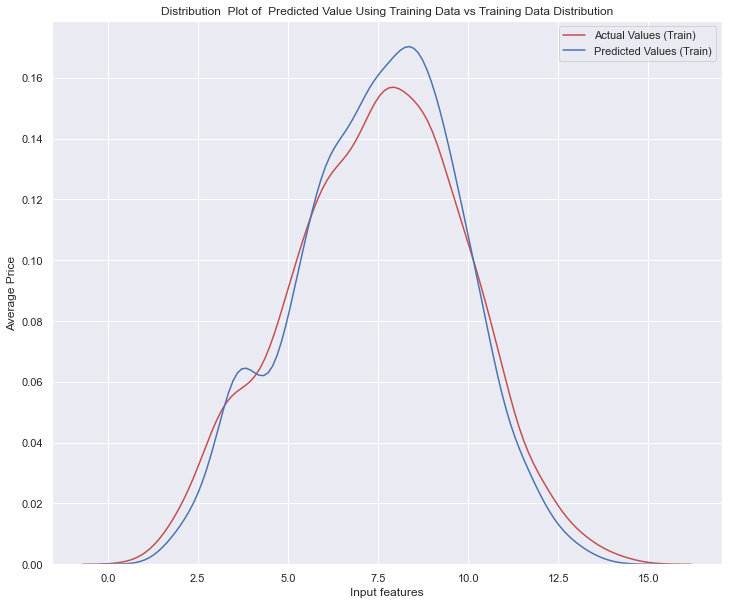

In [31]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yh_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

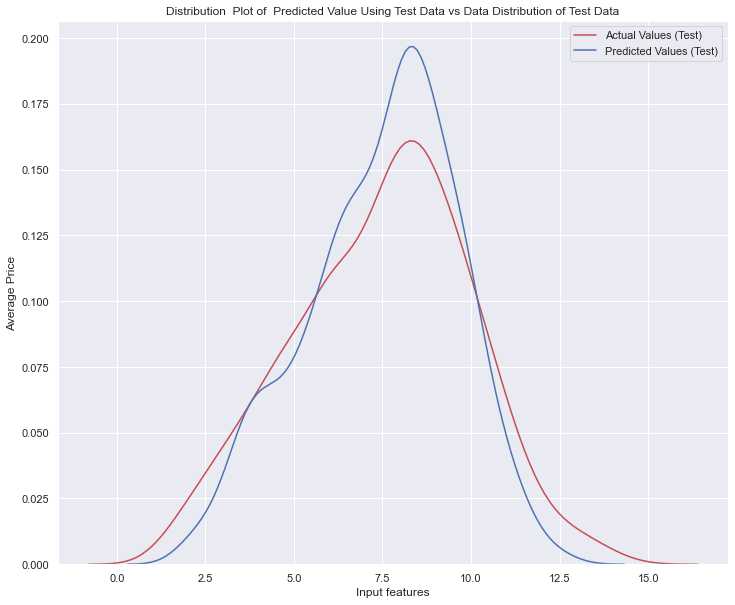

In [32]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yh_test,"Actual Values (Test)","Predicted Values (Test)",Title)


<h2>End of Machine learning Process</h2>


<h1>Now lets save our final model</h1>

In [33]:
import joblib
joblib.dump(RFR,'Temperature_Dataset.pkl')

['Temperature_Dataset.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">
